In [1]:
# project preprocessing

In [2]:
import statsmodels.api as statsmodel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 



In [3]:
pwd


'/Users/apoorvabanubakode/Downloads'

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
df.shape

(10000, 14)

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
testdf=df[df.Exited==0]
testdf.IsActiveMember.value_counts()
#around 3547 people are not active and not exited : active is subjective (how active whats the frequency etc)
#these are probably at higher risk of leaving.

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [8]:
testdf=df[df.Exited==0]
bal0rows=testdf[testdf.Balance==0]
print(bal0rows.shape)
# 3117 people ie 1/3rd people  not exited have a balance of 0 

# cant go with this. need to impute these values. 
bal0activerows=bal0rows[bal0rows.IsActiveMember==0]
print(bal0activerows.shape)
# 1424 people ie 15percent people who have not exited and are inactive have a balance of 0 : 
# we can assume :: higher probability of leaving

(3117, 11)
(1424, 11)


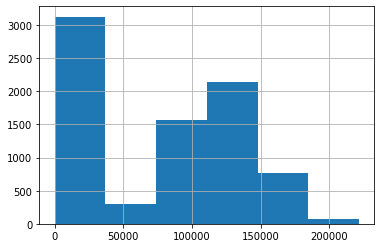

In [9]:
testdf['Balance'].hist(bins=6)

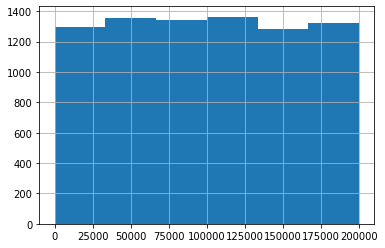

In [10]:
testdf['EstimatedSalary'].hist(bins=6)

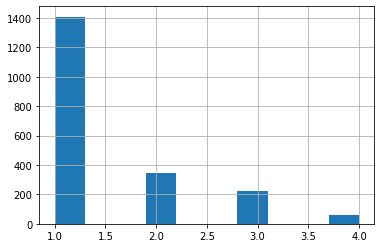

In [11]:
#at what balance did people exit bank;
testdf=df[df.Exited==1]
#testdf.Balance.hist()
testdf.Balance.mean()
# when exited.. was the number of products 0?
testdf.NumOfProducts.hist()
# peope who exited had 1 product 
# (affinity of leaving when only 1 product is more as probably : not keen in other products.)

In [12]:
#lets check what percentage of balance is estimated salary .
testdf=df[df.Balance!=0]
testdf['balance_percent_estimatedSalary']= (testdf['Balance']/testdf['EstimatedSalary'])
testdf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_percent_estimatedSalary
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.759604
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.963969


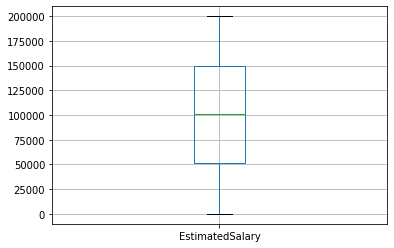

In [13]:
testdf.boxplot(column=['EstimatedSalary'])
#outier

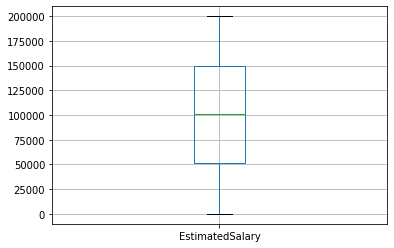

In [14]:
testdf.boxplot(column=['EstimatedSalary'])
#outier

In [15]:
#change estimated salary lower than 250000 to 250000.
df['EstimatedSalary']=np.where(df['EstimatedSalary']<25000,25000,df['EstimatedSalary'])


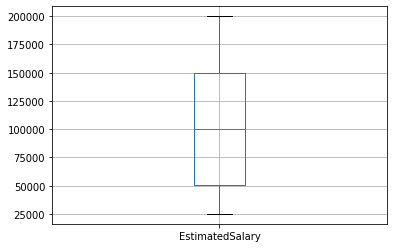

In [16]:
df.boxplot(column=['EstimatedSalary'])

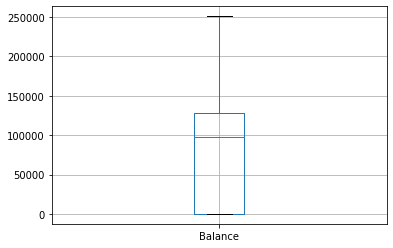

In [17]:
df.boxplot(column=['Balance'])

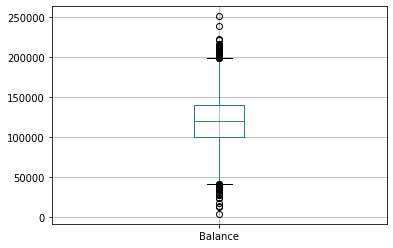

In [18]:
testdf.boxplot(column=['Balance'])


In [19]:
#dont change balance as actual figures not estimated.
#only change where balance =0 by 

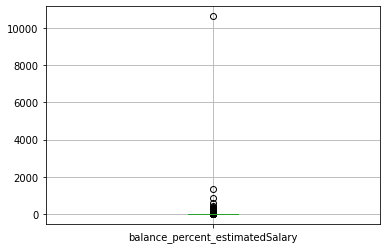

In [20]:
testdf.boxplot(column=['balance_percent_estimatedSalary'])

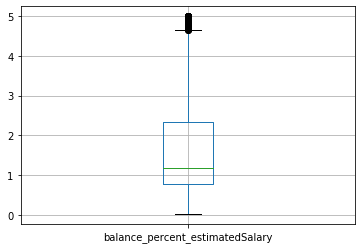

In [21]:
# 6 % values are outliers so we cap it to a lower bound = 5%
testdfbal=testdf
testdfbal['balance_percent_estimatedSalary']=np.where(testdfbal['balance_percent_estimatedSalary']>5,5,testdfbal['balance_percent_estimatedSalary'])
testdfbal.boxplot(column=['balance_percent_estimatedSalary'])

In [22]:
testdfbal['balance_percent_estimatedSalary'].mean()

1.8234554565222836

In [23]:
# for the balance which are 0 and are active and not exited , we will impute balance as 1.7 times* Estimated Salaries.
fil1=df['Balance']==0 
fil3=df['IsActiveMember']==1
fil2= df['Exited']==0



In [24]:
#what is the avg of this balance_percent_estimatedsalary
'''avg_percent_f=testdf[testdf.Gender=='Female']
bins= [0,30,50,70,100,130,160,200,250,300,350,400,1000]
avg_percent_f = avg_percent_f.groupby(pd.cut(avg_percent_f['balance_percent_estimatedSalary'], bins=bins)).balance_percent_estimatedSalary.count()
avg_percent_f.plot(kind='bar')
plt.show()
'''

"avg_percent_f=testdf[testdf.Gender=='Female']\nbins= [0,30,50,70,100,130,160,200,250,300,350,400,1000]\navg_percent_f = avg_percent_f.groupby(pd.cut(avg_percent_f['balance_percent_estimatedSalary'], bins=bins)).balance_percent_estimatedSalary.count()\navg_percent_f.plot(kind='bar')\nplt.show()\n"

In [25]:
'''#what is the avg of this balance_percent_estimatedsalary
avg_percent_f=testdf[testdf.Gender=='Male']
#avg_percent_f['balance_percent_estimatedSalary'].mean()
avg_percent_f.balance_percent_estimatedSalary.hist(bins=2)'''

"#what is the avg of this balance_percent_estimatedsalary\navg_percent_f=testdf[testdf.Gender=='Male']\n#avg_percent_f['balance_percent_estimatedSalary'].mean()\navg_percent_f.balance_percent_estimatedSalary.hist(bins=2)"

In [26]:
#highly unbalanced dataset,
#lets describe data 
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,101646.055783,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,55182.457016,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,25000.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
#means no missing values, has 10000 values for every column, 

In [28]:
# we are diving the  data into training set and test set the ration as 70/30 format
#train, test = train_test_split(df, test_size=0.3)

In [29]:
# to show there are no missing values 
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
# visulaize the dimension of training data
df.shape

(10000, 11)

In [31]:
# check the unique values of each attribute in the training data
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    8784
Exited                2
dtype: int64

In [32]:
#  LET'S TRY TO VISUALIZE THE FEATURES ONE BY ONE

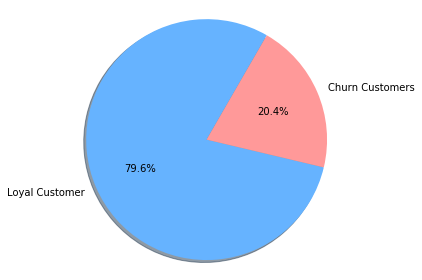

In [33]:
#No of Exited vs Active  get the percentage split figure
ExitedValues = df.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()


In [34]:
#Implies dataset is imbalanced

In [35]:
#In the  bankdata we have biased distribution i.e is 80% custoemrs are loyal and 20% are not so we need to make the data set balanced

Text(0.5, 1.0, 'CreditScore')

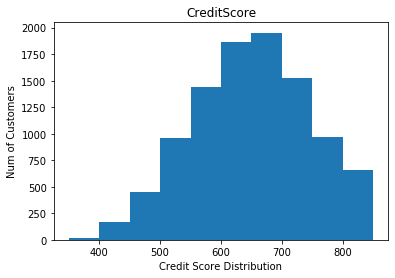

In [36]:
plt.hist(df['CreditScore'])
plt.xlabel('Credit Score Distribution')
plt.ylabel('Num of Customers')
plt.title('CreditScore')

In [37]:
# Nearly 55% of the customers creditscore is aroound 600-750.

Text(0.5, 1.0, 'Balance')

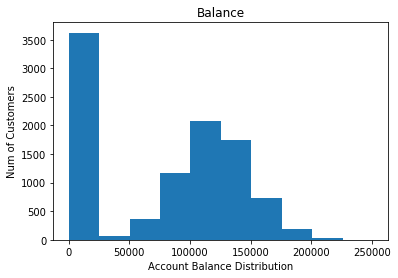

In [38]:
plt.hist(df['Balance'])
plt.xlabel('Account Balance Distribution')
plt.ylabel('Num of Customers')
plt.title('Balance')

In [39]:
## for the balance which are 0 
#we will impute balance as 1.7 times* Estimated Salaries.
df['Balance']=np.where(df['Balance']==0,(df['EstimatedSalary']*1.7),df['Balance'])

In [40]:
#and are active and not exited

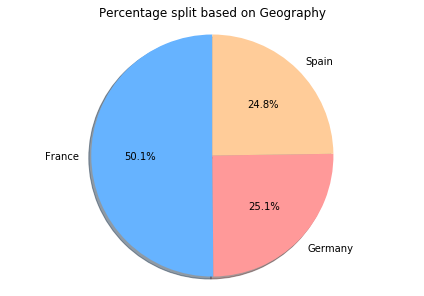

In [41]:
# this plot is to show how Geography play a role at the customer churn 
Geosplit = train.Geography.value_counts()
Geovalues  = df['Geography'].value_counts().values.tolist()
Geolabels  = df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.title('Percentage split based on Geography')
plt.show()


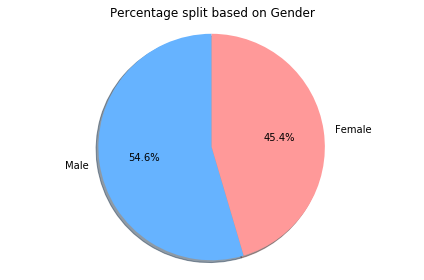

In [42]:
# this plot is to show how Gender play a role at the customer churn stuff
Gendervalues  = df['Gender'].value_counts().values.tolist()
GenderLabels = df['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f3.axis('equal')
plt.title('Percentage split based on Gender')
plt.tight_layout()
plt.show()

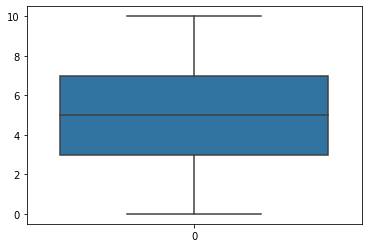

In [43]:
sns.boxplot(data= df['Tenure'], orient="v")
#i  feel this is not needed

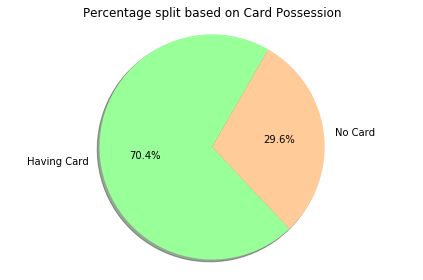

In [44]:
# this plot is to show how HasCrCard play a role at the customer churn 
HasCardvalues  = train['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Having Card" , "No Card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.title('Percentage split based on Card Possession')
plt.tight_layout()
plt.show()

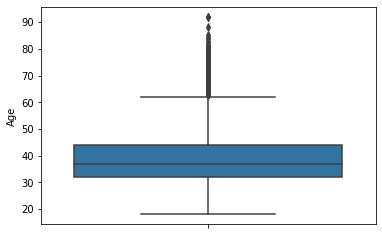

In [45]:
# lets have the plot for customers based on their age 
sns.boxplot(df['Age'] , orient = "v")

In [46]:
#400 people are senior members ; most of them lie in middle aged group.

In [47]:
# let's see the correlation matrix of the data
df[df.columns].corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,-0.007367,0.012238,-0.005458,0.025651,-0.002069,-0.027094
Age,-0.003965,1.000000,-0.009997,-0.020970,-0.030680,-0.011721,0.085472,-0.008284,0.285323
Tenure,0.000842,-0.009997,1.000000,0.006107,0.013444,0.022583,-0.028362,0.007170,-0.014001
Balance,-0.007367,-0.020970,0.006107,1.000000,0.127298,-0.001166,-0.007728,0.507476,-0.032275
NumOfProducts,0.012238,-0.030680,0.013444,0.127298,1.000000,0.003183,0.009612,0.014774,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.001166,0.003183,1.000000,-0.011866,-0.011599,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.007728,0.009612,-0.011866,1.000000,-0.011725,-0.156128
EstimatedSalary,-0.002069,-0.008284,0.007170,0.507476,0.014774,-0.011599,-0.011725,1.000000,0.012226
Exited,-0.027094,0.285323,-0.014001,-0.032275,-0.047820,-0.007138,-0.156128,0.012226,1.000000


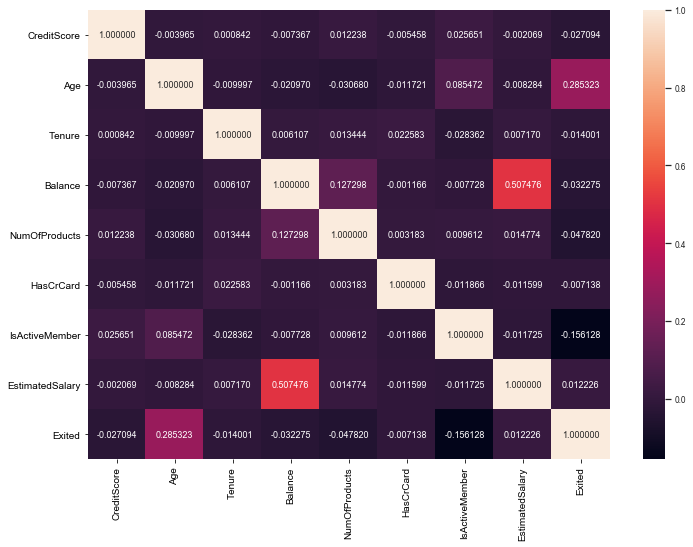

In [48]:
# generate the heatmap with the above data so that we can see what colums are corelated with the other one graphically
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(df.corr(), annot = True, fmt = ".6f")
plt.show()

In [49]:
# The above data says the Age, Balance, and Estimated Salary positively correlates with Exited meaning as value increases exited being 1 is more probable
# whereas  creditscore,Tenure, NumofProducts, Hs Credit Card, isACtive member negatively correlates meaning the values of these increase chances of exiting lessens

In [50]:
# balance attribute is negatively correlated with has credit card attribute.
#It means chances of getting credit card depends on balance as well, which reflects real life scenario.

In [51]:
#Separating churning  and nonchurning customers
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

In [52]:
#Let's Visulaize the data with respective to Exited column and numerical and categorical columns

In [53]:
target_column = ["Exited"]
cat_columns   = df.nunique()[df.nunique() < 5].keys().tolist()

cat_columns   = [x for x in cat_columns if x not in target_column]

num_columns   = [x for x in df.columns if x not in target_column + cat_columns ]

In [54]:
def plot_visualization(column) :
    
    first = go.Pie(labels  = churn[column].value_counts().keys().tolist(),
                    values  = churn[column].value_counts().values.tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    hole    = .7
                   )
    second = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .7,
                    name    = "Non churn customers")
    

    layout_details = go.Layout(dict(title = column + " distribution in customer attrition ", paper_bgcolor = "rgb(243,243,243)",
             annotations = [dict(text = "churn customers",font = dict(size = 13),showarrow = False,x = .15, y = .5),
                          dict(text = "Non churn customers",font = dict(size = 13),showarrow = False,x = .88,y = .5)]
                           ))
    
    
    data = [first,second]
    
    
    fig  = go.Figure(data = data,layout = layout_details)
    
    py.iplot(fig)

In [55]:
# Calling the function for plotting the pie plot for geography column
plot_visualization(cat_columns[0])

In [56]:
def hist_visulalization(column) :
    first = go.Histogram(x  = churn[column],histnorm= "percent",name = "Churn Customers",
                          marker = dict(line = dict(width = .5,color = "black")),opacity = .9 ) 
    
    second = go.Histogram(x  = not_churn[column],histnorm = "percent",name = "Non churn customers",
                          marker = dict(line = dict(width = .5,color = "black")),opacity = .9)
    
    data = [first,second]
    layout_details = go.Layout(dict(title =column + " distribution in customer attrition ",
                            
                                    paper_bgcolor = "rgb(243,243,243)",
                                    plot_bgcolor  = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(256, 256, 256)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           ))
    fig  = go.Figure(data=data,layout=layout_details)
    
    py.iplot(fig)

In [57]:
hist_visulalization(num_columns[1])
# as we deal with elder customers (in terms of age) their is a risk of losing them,

In [58]:
#plotting the pie plot for gender column
plot_visualization(cat_columns[1])

In [59]:
# Calling the function for plotting the histogram for tenure column 
hist_visulalization(num_columns[2])

In [60]:
#   plotting the pie plot for gender column
#  70% of the people who leave,  do not
plot_visualization(cat_columns[3])

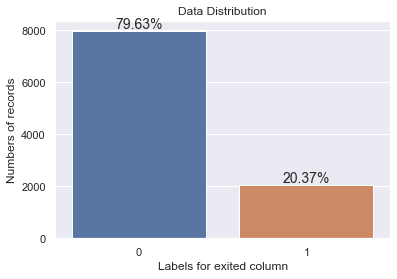

In [61]:
# Graphical representation of the target label percentage before upsampling
total_len = len(df['Exited'])
sns.set()
sns.countplot(df.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [62]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [63]:
from sklearn.utils import resample

In [64]:
#upsampling minority class to match to majority class
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority, replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [65]:
df_upsampled.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

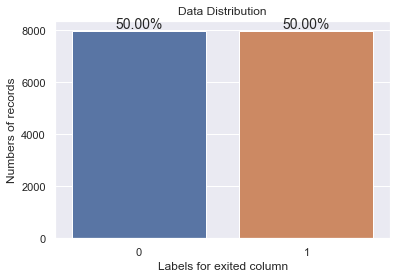

In [66]:
# Graphical representation of the target label percentage after balancing minority class
total_len = len(df_upsampled['Exited'])
sns.set()
sns.countplot(df_upsampled.Exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [67]:
# apply baseline model as logistic clasiification
# As the problem is of classification, 
# we will apply decision trees and random forest, and svm to the problem to check the accuracy later

In [186]:
df_new = df_upsampled

In [152]:
df_new.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [189]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [190]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.860,1,0,1,112542.58,0,0,1,0
3,699,39,1,159505.271,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.10,0,0,1,0
6,822,50,7,42500.000,2,1,1,25000.00,0,0,0,1
8,501,44,4,142051.070,2,0,1,74940.50,0,0,0,1


In [191]:
df_new.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [192]:
df_ex_ai=df_new

In [156]:
scale_down_column=pd.DataFrame(df_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [157]:
for col in scale_down_column.columns:
    scale_down_column[col]=scale_down_column[col].astype('float64')

In [75]:
scale_down_column.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
dtype: object

In [76]:
type(scale_down_column)

pandas.core.frame.DataFrame

In [77]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

scalar.fit(scale_down_column)
scale_down_column1=scalar.transform(scale_down_column)

scaled_df = pd.DataFrame(scale_down_column1, columns=scale_down_column.columns)
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.516,0.310811,0.1,0.238057,0.000000,0.500265
1,0.698,0.283784,0.1,0.463200,0.333333,0.393312
2,1.000,0.337838,0.2,0.362092,0.000000,0.309065
3,0.944,0.432432,0.7,0.115197,0.333333,0.000000
4,0.302,0.351351,0.4,0.411287,0.333333,0.285387


In [78]:
scaled_df.shape

(15926, 6)

In [79]:
df_new_half=df_new[[ 'HasCrCard',
       'IsActiveMember', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male','Exited']]
df_new_half.shape

(15926, 6)

In [80]:
df_new_half=df_new_half.reset_index(drop=True)
df_new_half.head()

,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0,1,0,1,0,0
1,0,0,0,0,0,0
2,1,1,0,1,0,0
3,1,1,0,0,1,0
4,0,1,0,0,1,0


In [81]:
scaled_df=scaled_df.reset_index(drop=True)
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.516,0.310811,0.1,0.238057,0.000000,0.500265
1,0.698,0.283784,0.1,0.463200,0.333333,0.393312
2,1.000,0.337838,0.2,0.362092,0.000000,0.309065
3,0.944,0.432432,0.7,0.115197,0.333333,0.000000
4,0.302,0.351351,0.4,0.411287,0.333333,0.285387


In [82]:
df_concat=pd.concat([scaled_df,df_new_half],axis=1)
df_concat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.516,0.310811,0.1,0.238057,0.000000,0.500265,0,1,0,1,0,0
1,0.698,0.283784,0.1,0.463200,0.333333,0.393312,0,0,0,0,0,0
2,1.000,0.337838,0.2,0.362092,0.000000,0.309065,1,1,0,1,0,0
3,0.944,0.432432,0.7,0.115197,0.333333,0.000000,1,1,0,0,1,0
4,0.302,0.351351,0.4,0.411287,0.333333,0.285387,0,1,0,0,1,0


In [83]:
df_concat.shape

(15926, 12)

In [84]:
df_new=df_concat

In [85]:
'''scalar=StandardScaler()
scaled_df = scalar.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_df, columns=df_new.columns)
scaled_df.head()'''

'scalar=StandardScaler()\nscaled_df = scalar.fit_transform(df_new)\nscaled_df = pd.DataFrame(scaled_df, columns=df_new.columns)\nscaled_df.head()'

In [86]:
df_y=df_new.loc[:,'Exited']
df_x=df_new.drop('Exited',axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(df_x,df_y,test_size=0.3, random_state=1)

In [87]:
ytest=ytest.reset_index(drop=True)

In [88]:
len(ytest)

4778

In [89]:
#Logistic Regression used as base model.

In [90]:
for solver in ['liblinear','lbfgs','sag','newton-cg']:
    lr=LogisticRegression(penalty='l2',solver=solver).fit(xtrain, ytrain)
    ypredicted=pd.Series(lr.predict(xtest))
    print('solver',solver, ':',accuracy_score(ytest,ypredicted))
    

for solver in ['saga']:
    lr=LogisticRegression(penalty='elasticnet',solver=solver,l1_ratio=0.8).fit(xtrain, ytrain)
    ypredicted=pd.Series(lr.predict(xtest))
    print('solver',solver, ':',accuracy_score(ytest,ypredicted))
    
print(confusion_matrix(ytest, ypredicted))
print(classification_report(ytest, ypredicted))

solver liblinear : 0.6946421096693177
solver lbfgs : 0.6950606948514022
solver sag : 0.6950606948514022
solver newton-cg : 0.6950606948514022
solver saga : 0.6961071578066137
[[1695  655]
 [ 797 1631]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2350
           1       0.71      0.67      0.69      2428

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



In [91]:
#baseline predictions using Logistic Regression are around 70% accuracy score 
#Recall is 0.72
#F1 is 0.70

In [92]:
# To get the weights of all the variables
#weights = pd.Series(lr.coef_[0],index=xtrain.columns.values)
#weights.sort_values(ascending = False)

In [94]:
for depth in [3,5,9,10]:
    for minsamples in [2,3,4]:
        for minleaf in [3,5,7]:
            dtree=DecisionTreeClassifier(max_depth=depth, min_samples_split=minsamples, min_samples_leaf=minleaf).fit(xtrain,ytrain)
            ypredicted=pd.Series(dtree.predict(xtest))
            print( 'with depth ',depth,'minsamples',minsamples, 'minleaf',minleaf, 'accuracy score is',accuracy_score(ytest,ypredicted))
print(confusion_matrix(ytest, ypredicted))
print(classification_report(ytest, ypredicted))

with depth  3 minsamples 2 minleaf 3 accuracy score is 0.7038509836751778
with depth  3 minsamples 2 minleaf 5 accuracy score is 0.7038509836751778
with depth  3 minsamples 2 minleaf 7 accuracy score is 0.7038509836751778
with depth  3 minsamples 3 minleaf 3 accuracy score is 0.7038509836751778
with depth  3 minsamples 3 minleaf 5 accuracy score is 0.7038509836751778
with depth  3 minsamples 3 minleaf 7 accuracy score is 0.7038509836751778
with depth  3 minsamples 4 minleaf 3 accuracy score is 0.7038509836751778
with depth  3 minsamples 4 minleaf 5 accuracy score is 0.7038509836751778
with depth  3 minsamples 4 minleaf 7 accuracy score is 0.7038509836751778
with depth  5 minsamples 2 minleaf 3 accuracy score is 0.7701967350355797
with depth  5 minsamples 2 minleaf 5 accuracy score is 0.7708246128087066
with depth  5 minsamples 2 minleaf 7 accuracy score is 0.7708246128087066
with depth  5 minsamples 3 minleaf 3 accuracy score is 0.7701967350355797
with depth  5 minsamples 3 minleaf 5 a

In [95]:
#with depth =9 min leaf =3 minsamples =2 we get optimal value of accuracy score. increasing these values too much can lead to overfitting so we just stop at points where we get optimal results


In [96]:
from sklearn.neighbors import KNeighborsClassifier
for neighbour in [2,3,4,5]:
    neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)

    neigh.fit(xtrain,ytrain) 

    ypredknn=pd.DataFrame(neigh.predict(xtest))
    print('neighbours ',neighbour, ': score is',accuracy_score(ytest,ypredknn))
print(confusion_matrix(ytest, ypredknn))
print(classification_report(ytest, ypredknn))

neighbours  2 : score is 0.8359146086228547
neighbours  3 : score is 0.8359146086228547
neighbours  4 : score is 0.8359146086228547
neighbours  5 : score is 0.8359146086228547
[[1786  564]
 [ 220 2208]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2350
           1       0.80      0.91      0.85      2428

    accuracy                           0.84      4778
   macro avg       0.84      0.83      0.83      4778
weighted avg       0.84      0.84      0.83      4778



In [97]:
#same score so can take any, accuracy is 0.8359

In [199]:
#Random Forest model and generate the importance of the features
features_label = xtrain.columns
for estimator in [10,50,100]:
    forest = RandomForestClassifier (n_estimators = estimator, random_state = 23)
    forest.fit(xtrain, ytrain)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("For estimator:",estimator)
    for i in range(xtrain.shape[1]):
        print("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

For estimator: 10
 1) CreditScore                    0.241846
 2) Age                            0.154848
 3) Tenure                         0.142051
 4) Balance                        0.127780
 5) NumOfProducts                  0.124892
 6) EstimatedSalary                0.076789
 7) HasCrCard                      0.040404
 8) IsActiveMember                 0.039237
 9) Geography_Germany              0.023188
10) Geography_Spain                0.016501
11) Gender_Male                    0.012464
For estimator: 50
 1) CreditScore                    0.253908
 2) Age                            0.153555
 3) Tenure                         0.130019
 4) Balance                        0.128840
 5) NumOfProducts                  0.126092
 6) EstimatedSalary                0.078181
 7) HasCrCard                      0.040272
 8) IsActiveMember                 0.036795
 9) Geography_Germany              0.021481
10) Geography_Spain                0.017296
11) Gender_Male                    0.013

In [200]:
#best for n=100 trees, so lets go with it

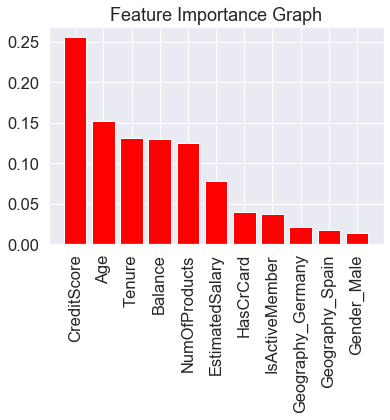

In [201]:
# Visualization of the Feature importances of each one
plt.title('Feature Importance Graph')
plt.bar(range(xtrain.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(xtrain.shape[1]), features_label, rotation = 90)
plt.show()

In [202]:
ypredicted=pd.Series(forest.predict(xtest))
print(accuracy_score(ytest,ypredicted))

0.9390958560066973


In [203]:
print(confusion_matrix(ytest, ypredicted))
print(classification_report(ytest, ypredicted))

[[2141  209]
 [  82 2346]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2350
           1       0.92      0.97      0.94      2428

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



In [102]:
ytest.value_counts()

1    2428
0    2350
Name: Exited, dtype: int64

In [193]:
# Random forest on unscaled data : for explainable Ai
# df_ex_ai data frame.
df_new_y=df_ex_ai.loc[:,'Exited']
df_new_x=df_ex_ai.drop('Exited',axis=1)

xtrain1,xtest1,ytrain1,ytest1=train_test_split(df_new_x,df_new_y,test_size=0.3, random_state=1)
features_label = xtrain1.columns
for estimator in [100]:
    forest1 = RandomForestClassifier (n_estimators = estimator, random_state = 23)
    forest1.fit(xtrain1, ytrain1)
    importances = forest1.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("For estimator:",estimator)
    for i in range(xtrain1.shape[1]):
        print("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))
'''plt.title('Feature Importance Graph')
plt.bar(range(xtrain1.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(xtrain1.shape[1]), features_label, rotation = 90)
plt.show()'''
ypredicted1=pd.Series(forest1.predict(xtest1))
#print(accuracy_score(ytest1,ypredicted1))

For estimator: 100
 1) CreditScore                    0.256274
 2) Age                            0.152112
 3) Tenure                         0.129934
 4) Balance                        0.127916
 5) NumOfProducts                  0.126534
 6) HasCrCard                      0.078109
 7) IsActiveMember                 0.040922
 8) EstimatedSalary                0.036213
 9) Geography_Germany              0.020640
10) Geography_Spain                0.017653
11) Gender_Male                    0.013693


In [104]:
from sklearn.svm import SVC


In [105]:
svmpoly=SVC(kernel='linear',verbose=False, max_iter=-1)

In [106]:
svmpoly.fit(xtrain,ytrain)
y_pred = svmpoly.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[1724  626]
 [ 785 1643]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2350
           1       0.72      0.68      0.70      2428

    accuracy                           0.70      4778
   macro avg       0.71      0.71      0.70      4778
weighted avg       0.71      0.70      0.70      4778



In [107]:
svmpoly=SVC(kernel='rbf', gamma='auto',verbose=False, max_iter=-1)

In [108]:
svmpoly.fit(xtrain,ytrain)
y_pred = svmpoly.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[1788  562]
 [ 766 1662]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      2350
           1       0.75      0.68      0.71      2428

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778



In [109]:
svmpoly=SVC(kernel='sigmoid',verbose=False, max_iter=-1)

In [110]:
svmpoly.fit(xtrain,ytrain)
y_pred = svmpoly.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[1658  692]
 [ 970 1458]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2350
           1       0.68      0.60      0.64      2428

    accuracy                           0.65      4778
   macro avg       0.65      0.65      0.65      4778
weighted avg       0.65      0.65      0.65      4778



In [111]:
for degree in [2,3,4,5,6,7]:
    svmpoly=SVC(kernel='poly', degree=degree,verbose=False)
    svmpoly.fit(xtrain,ytrain)
    y_pred = svmpoly.predict(xtest)
    print(confusion_matrix(ytest, y_pred))
    print(classification_report(ytest, y_pred))

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[1661  689]
 [ 772 1656]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      2350
           1       0.71      0.68      0.69      2428

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[1537  813]
 [ 763 1665]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2350
           1       0.67      0.69      0.68      2428

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.67      4778
weighted avg       0.67      0.67      0.67      4778



/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[1304 1046]
 [ 601 1827]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      2350
           1       0.64      0.75      0.69      2428

    accuracy                           0.66      4778
   macro avg       0.66      0.65      0.65      4778
weighted avg       0.66      0.66      0.65      4778



/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[ 816 1534]
 [ 330 2098]]
              precision    recall  f1-score   support

           0       0.71      0.35      0.47      2350
           1       0.58      0.86      0.69      2428

    accuracy                           0.61      4778
   macro avg       0.64      0.61      0.58      4778
weighted avg       0.64      0.61      0.58      4778



/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[ 520 1830]
 [ 175 2253]]
              precision    recall  f1-score   support

           0       0.75      0.22      0.34      2350
           1       0.55      0.93      0.69      2428

    accuracy                           0.58      4778
   macro avg       0.65      0.57      0.52      4778
weighted avg       0.65      0.58      0.52      4778



/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



[[ 306 2044]
 [  94 2334]]
              precision    recall  f1-score   support

           0       0.77      0.13      0.22      2350
           1       0.53      0.96      0.69      2428

    accuracy                           0.55      4778
   macro avg       0.65      0.55      0.45      4778
weighted avg       0.65      0.55      0.46      4778



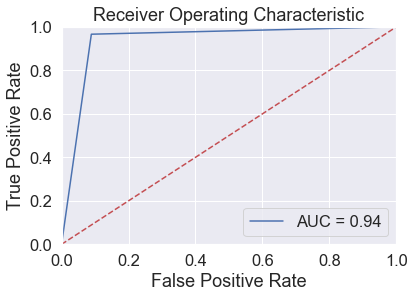

In [112]:
#After testing all of these, we conclude that random forest performs the best, hence lets see the ROC/AUC graph :
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypredicted)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
xtest1=pd.DataFrame(xtest)
y_pred1=pd.DataFrame(ypredicted)
xtest1=xtest1.reset_index(drop=True)
y_pred1=y_pred1.reset_index(drop=True)

In [114]:
testsvm=pd.concat([xtest1,y_pred1],axis=1)
testsvm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,0
0,0.522,0.378378,0.6,0.220803,0.333333,0.119356,1,0,0,1,1,1
1,0.602,0.297297,0.1,0.389602,0.333333,0.853946,0,0,1,0,1,1
2,0.710,0.486486,0.3,0.363218,0.666667,0.405809,1,0,1,0,0,1
3,0.302,0.148649,0.8,0.558448,0.333333,0.500960,1,0,0,0,0,0
4,0.364,0.351351,0.3,0.430752,0.000000,0.284804,1,0,0,0,1,1


In [115]:
testsvm.shape

(4778, 12)

In [116]:
testsvmonly_one = testsvm[testsvm.iloc[:,-1] == 1]
testsvmonly_one.shape

(2555, 12)

In [117]:
testsvmonly_one.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,0
0,0.522,0.378378,0.6,0.220803,0.333333,0.119356,1,0,0,1,1,1
1,0.602,0.297297,0.1,0.389602,0.333333,0.853946,0,0,1,0,1,1
2,0.710,0.486486,0.3,0.363218,0.666667,0.405809,1,0,1,0,0,1
4,0.364,0.351351,0.3,0.430752,0.000000,0.284804,1,0,0,0,1,1
5,0.774,0.283784,0.7,0.375598,0.333333,0.173473,0,0,0,1,0,1


In [118]:
testsvmonly_one.columns

Index([      'CreditScore',               'Age',            'Tenure',
                 'Balance',     'NumOfProducts',   'EstimatedSalary',
               'HasCrCard',    'IsActiveMember', 'Geography_Germany',
         'Geography_Spain',       'Gender_Male',                   0],
      dtype='object')

In [119]:
churn =testsvmonly_one
churn.drop(0,inplace=True,axis=1)
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,0.522,0.378378,0.6,0.220803,0.333333,0.119356,1,0,0,1,1
1,0.602,0.297297,0.1,0.389602,0.333333,0.853946,0,0,1,0,1
2,0.710,0.486486,0.3,0.363218,0.666667,0.405809,1,0,1,0,0
4,0.364,0.351351,0.3,0.430752,0.000000,0.284804,1,0,0,0,1
5,0.774,0.283784,0.7,0.375598,0.333333,0.173473,0,0,0,1,0


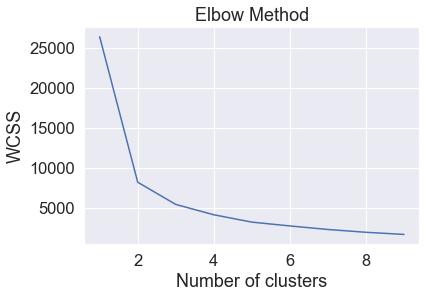

In [127]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(churn)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

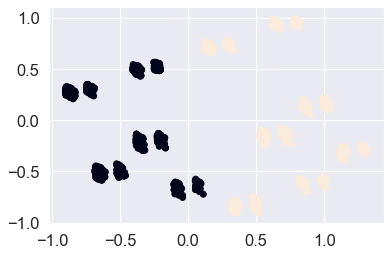

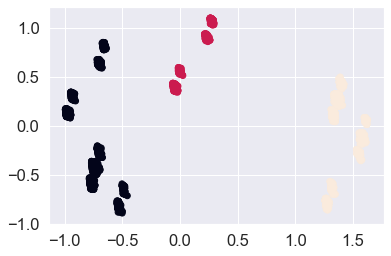

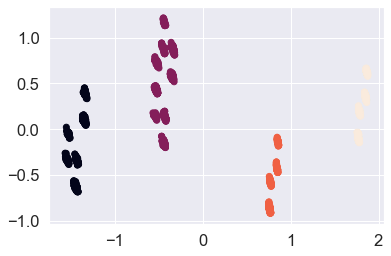

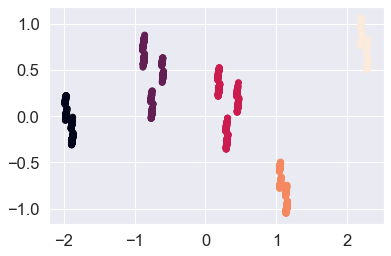

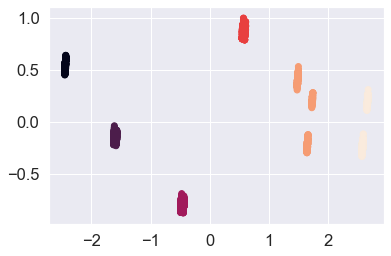

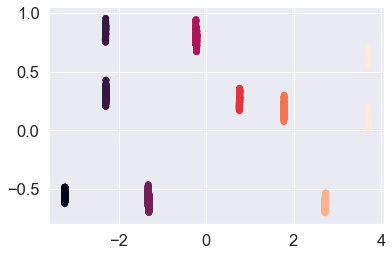

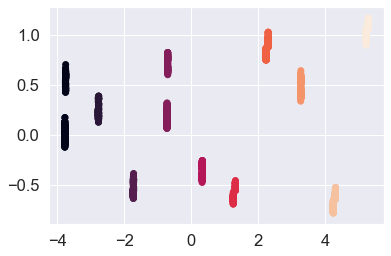

In [130]:
'''fig = plt.figure(figsize=(8, 6))
#t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')


'''
clusterlist=[2,3,4,5,6,8,10]
for c in clusterlist:
    km= KMeans(n_clusters=c)
    clusters=km.fit_predict(churn)
    churn['clusters']=clusters
    
    #print(churn)
   
    from sklearn.decomposition import PCA
    pca = PCA(2,random_state=1)

    plot_columns = pca.fit_transform(churn)
    #print(plot_columns)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],  c=churn["clusters"])
    plt.show()

    # Plot based on the two dimensions, and shade by cluster label
    #ax.scatter(xs=plot_columns[:,0], xy=plot_columns[:,1],ys=plot_columns[:,2],marker='o', c=churn["clusters"], s=30)
    #plt.show()

    #print(km.cluster_centers_)

In [131]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.00205698 -0.00112437 -0.00393736 -0.00477983  0.00522206 -0.00209364
  -0.00200944  0.06169924  0.04653599  0.02236132 -0.00904527  0.99667759]
 [-0.01339083  0.00342442 -0.04552905  0.05816872  0.04965878  0.05871445
  -0.12308726  0.12876834 -0.78607373  0.53451847 -0.22995248  0.01439756]]
[8.74891836 0.29426709]


In [132]:
pca.explained_variance_ratio_

array([0.86446472, 0.029076  ])

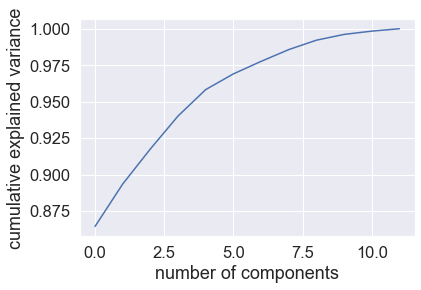

In [133]:
pca = PCA().fit(churn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [209]:
'''clusterlist=[4]
for c in clusterlist:
    km= KMeans(n_clusters=c)
    clusters=km.fit_predict(churn)
    churn['clusters']=clusters
    
    #print(churn)
   
    from sklearn.decomposition import PCA
    pca = PCA(2,random_state=1)

    plot_columns = pca.fit_transform(churn)
    #print(plot_columns)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],  c=churn["clusters"])
    plt.show()
'''


'clusterlist=[4]\nfor c in clusterlist:\n    km= KMeans(n_clusters=c)\n    clusters=km.fit_predict(churn)\n    churn[\'clusters\']=clusters\n    \n    #print(churn)\n   \n    from sklearn.decomposition import PCA\n    pca = PCA(2,random_state=1)\n\n    plot_columns = pca.fit_transform(churn)\n    #print(plot_columns)\n    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],  c=churn["clusters"])\n    plt.show()\n'

In [134]:
# Explainable AI ?
import shap

In [135]:
shap.initjs()

In [171]:
X_train_summary = shap.kmeans(xtrain1, 10)

In [172]:
explainer = shap.KernelExplainer(model=forest1.predict_proba,data=X_train_summary,model_output="margin" )
shap_values = explainer.shap_values(xtest.iloc[:100])


/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

In [173]:
shap.force_plot(explainer.expected_value[1], shap_values[1], xtest1.iloc[:100])

In [196]:
# very likely to churn, probability of churning is 1
xtest1.iloc[2]

CreditScore             705.0
Age                      54.0
Tenure                    3.0
Balance              125889.3
NumOfProducts             3.0
HasCrCard                 1.0
IsActiveMember            0.0
EstimatedSalary       96013.5
Geography_Germany         1.0
Geography_Spain           0.0
Gender_Male               0.0
Name: 6911, dtype: float64

In [197]:
shap_values = explainer.shap_values(xtest1.iloc[2])
shap.force_plot(explainer.expected_value[1], shap_values[1], xtest1.iloc[2])

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!



In [195]:
# not likely to churn, probability of churning is 0.43
xtest1.iloc[4777]

CreditScore             655.000
Age                      60.000
Tenure                    3.000
Balance              147868.465
NumOfProducts             2.000
HasCrCard                 1.000
IsActiveMember            1.000
EstimatedSalary       86981.450
Geography_Germany         0.000
Geography_Spain           0.000
Gender_Male               0.000
Name: 5708, dtype: float64

In [184]:
shap_values = explainer.shap_values(xtest1.iloc[4777])
shap.force_plot(explainer.expected_value[1], shap_values[1], xtest1.iloc[4777])

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!



In [194]:
# not likely to churn, probability of churning is 0.18
xtest1.iloc[2356]

CreditScore             634.00
Age                      37.00
Tenure                    3.00
Balance              111432.77
NumOfProducts             2.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      167032.49
Geography_Germany         1.00
Geography_Spain           0.00
Gender_Male               1.00
Name: 833, dtype: float64

In [185]:
shap_values = explainer.shap_values(xtest1.iloc[2356])
shap.force_plot(explainer.expected_value[1], shap_values[1], xtest1.iloc[2356])

/Users/apoorvabanubakode/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

